# 4주차_선형회귀분석_정답

## 모듈 불러오기

In [0]:
from IPython.display import display, HTML

# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 성능 평가 패키지
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

## 데이터 불러오기

### Toyota Corolla Data
### 중고차 가격(Price)를 예측하기 위한 예측모델 학습

In [65]:
from google.colab import drive
drive.mount('/content/gdrive/')
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
data = pd.read_csv('WEEK_4_Data/ToyotaCorolla.csv')

In [67]:
display(data.head())

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [68]:
display(data['Price'].head())

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [69]:
data.drop('Price',axis=1).head()

,Id,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23,10,2002,46986,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23,10,2002,72937,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,24,9,2002,41711,Diesel,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,26,7,2002,48000,Diesel,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,30,3,2002,38500,Diesel,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


## 데이터 전처리하기
### 1. 예측에 필요하지 않은 변수 제거
- 'id', 'Model', 'Fuel_Type'

In [0]:
data = data.drop(['Id', 'Model', 'Fuel_Type'], axis=1)

In [71]:
data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


### 2. 학습 데이터와 테스트 데이터로 분리
- test_size = 0.2

In [0]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=55)

## 모델링

### 학습 데이터를 이용하여 선형회귀모델 학습

In [0]:
lm = sm.OLS(train_data['Price'], train_data.drop('Price', axis=1))
lm_trained = lm.fit()

### 모델 학습 결과 (Summary) 확인

In [74]:
lm_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     361.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:40:48   Log-Likelihood:                -9685.4
No. Observations:                1148   AIC:                         1.943e+04
Df Residuals:                    1116   BIC:                         1.960e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -118.1849      3.898    -30.316      0.000    -125.834    -110.536
Mfg_Month          -97.7101     10.306     -9.480      0.000    -117.932     -77.488
Mfg_Year             1.0347      0.772      1.340      0.181      -0.481       2.550
KM                  -0.0193      0.001    -16.068      0.000      -0.022      -0.017
HP                  23.2578      2.781      8.362      0.000      17.800      28.715
Met_Color          -70.0260     77.072     -0.909      0.364    -221.247      81.195
Automatic          314.0374    146.989      2.136      0.033      25.632     602.443
cc                  -0.1033      0.079     -1.314      0.189      -0.258       0.051
Doors               52.8482     39.920      1.324      0.186     -25.478     131.174
Cylinders           -0.0338      0.002    -15.775      0.000      -0.038      -0.030
Gears              209.4886    188.077      1.114      0.266    -159.535     578.513
Quarterly_Tax        7.0127      1.385      5.062      0.000       4.294       9.731
Weight              11.6469      1.215      9.585      0.000       9.263      14.031
Mfr_Guarantee      256.9534     75.402      3.408      0.001     109.007     404.900
BOVAG_Guarantee    558.2751    126.720      4.406      0.000     309.639     806.911
Guarantee_Period    72.0395     13.001      5.541      0.000      46.531      97.548
ABS               -392.3997    127.379     -3.081      0.002    -642.330    -142.470
Airbag_1           -37.8040    242.312     -0.156      0.876    -513.243     437.635
Airbag_2           111.3504    132.354      0.841      0.400    -148.339     371.040
Airco              137.0104     90.264      1.518      0.129     -40.095     314.116
Automatic_airco   2429.8592    189.097     12.850      0.000    2058.833    2800.886
Boardcomputer     -348.9142    118.406     -2.947      0.003    -581.238    -116.591
CD_Player          172.3370    101.320      1.701      0.089     -26.462     371.136
Central_Lock      -145.3826    142.485     -1.020      0.308    -424.951     134.185
Powered_Windows    524.5680    142.475      3.682      0.000     245.019     804.117
Power_Steering    -334.5014    276.158     -1.211      0.226    -876.350     207.347
Radio             -429.3428    824.319     -0.521      0.603   -2046.733    1188.047
Mistlamps          -13.3876    109.813     -0.122      0.903    -228.850     202.075
Sport_Model        331.6406     88.660      3.741      0.000     157.682     505.599
Backseat_Divider  -139.6443    125.503     -1.113      0.266    -385.892     106.604
Metallic_Rim       235.9553     95.268      2.477      0.013      49.031     422.880
Radio_cassette     350.6742    826.406      0.424      0.671   -1270.811    1972.159
Tow_Bar           -153.8526     80.061     -1.922      0.055    -310.939       3.234
=======================

## 예측성능 평가

### 1. 학습 데이터셋에 대한 예측성능 평가
MSE, RMSE 계산하여 성능 확인

In [75]:
train_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1302,7450,77,4,1998,70932,110,1,0,1600,3,4,5,69,1050,1,1,3,1,1,1,0,0,0,0,1,1,1,0,0,1,1,0,0,0
360,12950,39,6,2001,24444,110,1,0,1600,3,4,5,69,1040,1,1,3,1,1,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1
336,12900,33,12,2001,31000,110,1,0,1600,5,4,5,19,1075,0,1,6,1,1,0,1,0,1,0,1,1,1,0,0,0,0,1,0,0
1217,8250,80,1,1998,85565,110,0,0,1600,5,4,5,85,1070,0,1,3,1,1,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1
704,8450,65,4,1999,93408,86,0,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0


In [76]:
train_pred = lm_trained.predict(train_data.drop(['Price'], axis=1))

print('Training MSE: {:.3f}'.format(mean_squared_error(train_data['Price'], train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(train_data['Price'], train_pred))))

Training MSE: 1246303.204
Training RMSE: 1116.380


### 2. 테스트 데이터셋에 대한 예측성능 평가
MSE, RMSE 계산하여 성능 확인

In [77]:
test_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1283,8950,76,5,1998,73116,110,1,0,1600,5,4,5,85,1075,0,1,3,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
553,10995,50,7,2000,41273,97,0,0,1400,5,4,5,85,1060,1,1,3,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1
571,11500,52,5,2000,35823,110,0,0,1600,5,4,5,85,1075,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
552,12950,49,8,2000,41636,110,1,0,1600,5,4,5,19,1105,0,1,12,1,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
1126,6800,80,1,1998,110000,110,1,0,1600,4,4,5,69,1035,0,1,3,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [78]:
test_pred = lm_trained.predict(test_data.drop(['Price'], axis=1))

print('Testing MSE: {:.3f}'.format(mean_squared_error(test_data['Price'], test_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(test_data['Price'], test_pred))))

Testing MSE: 1275981.999
Training RMSE: 1129.594


## 결과 출력

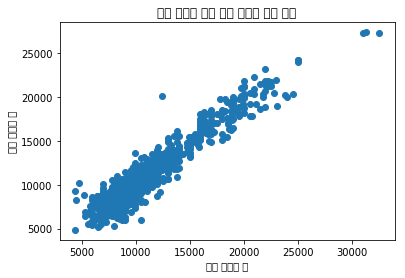

In [79]:
plt.scatter(train_data['Price'], train_pred)
plt.xlabel("실제 중고차 값")
plt.ylabel("예측 중고차 값")
plt.title("실제 중고차 값과 예측 중고차 값의 관계")
plt.show()

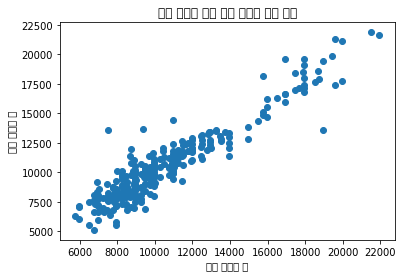

In [80]:
plt.scatter(test_data['Price'], test_pred)
plt.xlabel("실제 중고차 값")
plt.ylabel("예측 중고차 값")
plt.title("실제 중고차 값과 예측 중고차 값의 관계")
plt.show()